<img src="https://www.machinelearningmastery.ru/img/0-830814-871811.jpeg" style="width: 400px">


**`Ссылки на литературу`**:  

* [Машинное обучение на Python-е с интерактивными Jupyter демонстрациями](https://habr.com/ru/post/433886/)  
* [Линейная регрессия на Python](https://proglib.io/p/linear-regression)  
* [Открытый курс машинного обучения. Тема 4. Линейные модели классификации и регрессии](https://habrahabr.ru/company/ods/blog/323890/#1-lineynaya-regressiya)  
* [A Course of Econometrics by : D.S.G. Pollock](https://www.le.ac.uk/users/dsgp1/COURSES/MESOMET/ECMETXT/mesmtric.htm)
* [Линейная регрессия на наборе данных жилья в Бостоне](https://www.machinelearningmastery.ru/linear-regression-on-boston-housing-dataset-f409b7e4a155/#)




# <center> Линейная регрессия и интерпретация коэффициентов уравнения линейной регрессии </center>

### Оглавление:

1. Что такое линейная регрессия и когда она нужна?
2. Постановка задачи и метод наименьших квадратов
3. Исследовательский анализ данных датасета жилья в Бостоне
4. Линейная регрессия в statsmodels, значимость и интерпретация коэффициентов, метрики качества
5. Простая линейная регрессия со scikit-learn

<img src="https://www.machinelearningmastery.ru/img/0-644661-384392.png" style="width: 400px">

## <center> 1. Что такое линейная регрессия и когда она нужна?<center>

Регрессия ищет отношения между переменными.

Для примера можно взять сотрудников какой-нибудь компании и понять, как значение зарплаты зависит от других **данных**, таких как опыт работы, уровень образования, роль, город, в котором они работают, и так далее. Таким же способом можно установить математическую зависимость между ценами домов в определённой области, количеством комнат, расстоянием от центра и т. д.

Другими словами, **вам нужно найти функцию, которая отображает зависимость одних переменных или данных от других.** Зависимые данные называются **зависимыми переменными, выходами или ответами.** Независимые данные называются **независимыми переменными, входами или предсказателями.**

Обычно в регрессии присутствует **одна непрерывная и неограниченная зависимая переменная**. Входные переменные могут быть неограниченными, дискретными или категориальными данными, такими как пол, национальность, бренд, etc.

<img src="https://thepresentation.ru/img/tmb/4/381534/c1b5895933b9e85d07c00680aa86155c-800x.jpg" style="width: 400px">

### Когда вам нужна регрессия?

Регрессия полезна для **прогнозирования ответа на новые условия**. Можно угадать потребление электроэнергии в жилом доме из данных температуры, времени суток и количества жильцов. Регрессия используется во многих отраслях: экономика, компьютерные и социальные науки, прочее. Её важность растёт с доступностью больших данных.

**Линейная регрессия** – одна из важнейших и широко используемых техник регрессии. Эта самый простой метод регрессии. Одним из его достоинств является лёгкость интерпретации результатов.

## <center> 2. Постановка задачи и метод наименьших квадратов<center>

Линейная регрессия некоторой **зависимой переменной y** на набор **независимых переменных x = (x₁, …, xᵣ)**, где **r** – это число характеристик, предполагает, что линейное отношение между y и x:  
### <center>  **y = 𝛽₀ + 𝛽₁x₁ + ⋯ + 𝛽ᵣxᵣ + 𝜀** <center> 
Это уравнение регрессии. **𝛽₀, 𝛽₁, …, 𝛽ᵣ** – коэффициенты регрессии, и **𝜀** – случайная ошибка.

Линейная регрессия вычисляет оценки коэффициентов регрессии или просто прогнозируемые веса, обозначаемые как 𝛽₀, 𝛽₁, …, 𝛽ᵣ. Они определяют оценку функции регрессии.

Для каждого наблюдения, **предсказанный ответ f(xᵢ)** должен быть как можно ближе к соответствующему **фактическому ответу yᵢ**.  Разницы **yᵢ − f(xᵢ)** для всех наблюдений называются **остатками**. Регрессия определяет лучшие веса, которые соответствуют наименьшим остаткам.

Для получения лучших весов, вам нужно минимизировать сумму квадратов остатков (SSR) для всех наблюдений: 
### <center>    SSR = Σᵢ(yᵢ − f(xᵢ))²  -> min <center>
    
Этот подход называется **методом наименьших квадратов**.

<img src="http://risovach.ru/thumb/upload/200s400/2015/07/mem/rik-i-karl_87200405_orig_.png?bzexs" style="width: 200px">

## <center> 3. Исследовательский анализ данных датасета жилья в Бостоне <center>

В этом наборе данных 506 объектов и 13 переменных. Цель состоит в том, чтобы спрогнозировать стоимость дома с использованием заданных характеристик.

#### Описание переменных:

* **`CRIM` $-$** Уровень преступности на душу населения  
* **`ZN` $-$** Доля жилых земель, зонированных под участки площадью более 25 000 кв. футов.  
* **`INDUS` $-$** Доля неторговых площадей  
* **`CHAS` $-$** Переменная реки Чарльз (= 1, если участок граничит с рекой; 0 в противном случае)  
* **`NOX` $-$** Концентрация оксида азота  
* **`RM` $-$** Среднее количество комнат в жилом доме  
* **`AGE` $-$** Доля домов, построенных до 1940 г.  
* **`DIS` $-$** Взвешенное расстояние до пяти центров занятости Бостона  
* **`RAD` $-$** Индекс доступности радиальных магистралей  
* **`TAX` $-$** Полная ставка налога на имущество  
* **`PTRATIO` $-$** Cоотношение учеников и учителей по городам  
* **`B` $-$** 1000 (Bk - 0,63) ², где Bk - доля лиц афроамериканского происхождения  
* **`LSTAT` $-$** Процент населения с более низким статусом  
* **`MEDV` $-$** Средняя стоимость домов

#### **Импортируем библиотеки**

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 
import statsmodels.api as sm

%matplotlib inline

import warnings

warnings.filterwarnings('ignore')

**Load the Boston Housing DataSet from scikit-learn**

In [2]:
from sklearn.datasets import load_boston

boston_dataset = load_boston()

# boston_dataset — это словарь
# давайте проверим, что в нем содержится
boston_dataset.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

'data': содержит информацию для различных домов  
'target': цены на дом  
feature_names: названия функций  
DESCR: описывает набор данных  

**Задание 1.** Давайте выведем описание набора данных:

In [3]:
###YOUR CODE HERE


**Load the data into pandas dataframe**

In [4]:
boston = pd.DataFrame(boston_dataset.data, columns=boston_dataset.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


**Целевая переменная (средняя стоимость домов) отсутствует в данных. Создадим новый столбец целевых значений и добавим его в фреймворк данных:**

In [5]:
boston['MEDV'] = boston_dataset.target

### **Data Visualization**  


Исследовательский анализ данных является очень важным шагом перед обучением модели. В этом разделе мы будем использовать некоторые визуализации, чтобы понять связь целевой переменной с другими функциями.



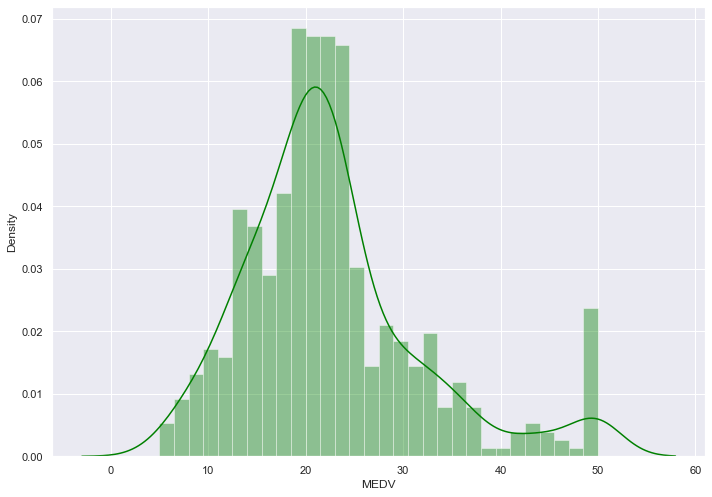

In [6]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

# построим гистограмму, показывающую распределение целевой переменной
sns.distplot(boston['MEDV'], bins=30, color='green')
plt.show()

На основе гистограммы, можем предположить, что значения MEDV распределяются нормально с небольшим количеством выбросов.  
Проверим гипотезу с помощью статистического теста:

In [7]:
#тест Шапиро-Уилка для проверки нормального распределения
from scipy.stats import shapiro
stat, p = shapiro(boston['MEDV'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Переменная имеет нормальный закон распределения (fail to reject H0)')
else:
    print('Переменная не имееет нормальный закон распределения (reject H0)')

Statistics=0.917, p=0.000
Переменная не имееет нормальный закон распределения (reject H0)


<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQcFOaiQH7C6HnooICEwcbKS8EuVv04A92-dg&usqp=CAU" style="width: 300px">

**Задание 2.** Постройте гистограмму, показывающую распределение переменной "Среднее количество комнат в жилом доме" и проверьте гипотезу о нормальном распределении с помощью теста Шапиро-Уилка:

In [8]:
###YOUR CODE HERE


### **Correlation matrix**

Коэффициент корреляции варьируется от -1 до 1. Если значение близко к 1, это означает, что между двумя переменными существует сильная положительная корреляция. Когда оно близко к -1, переменные имеют сильную отрицательную корреляцию.

In [9]:
# вычисляем попарную корреляцию для всех переменых
correlation_matrix = boston.corr().round(2)

<AxesSubplot:>

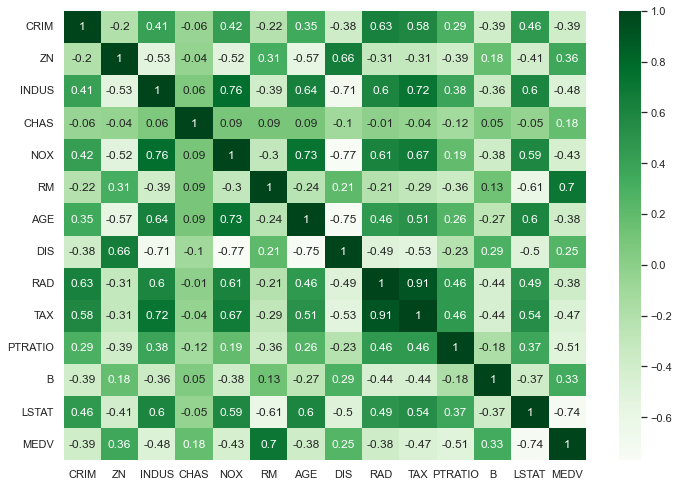

In [10]:
# используем тепловую карту от seaborn для построения корреляционной матрицы
# annot = True, чтобы напечатать значения внутри квадрата
sns.heatmap(data=correlation_matrix, annot=True, cmap = 'Greens')

* Из приведенного выше графика корреляции видно, что **MEDV** сильно коррелирует с **LSTAT**(-0,74), **RM** (0,7)

* **RAD** и **TAX** сильно коррелированы (0,91), поэтому мы не включаем их в модель регрессии вместе, чтобы избежать мультиколлинеарности. То же самое касается функций DIS и AGE, которые имеют корреляцию -0,75.


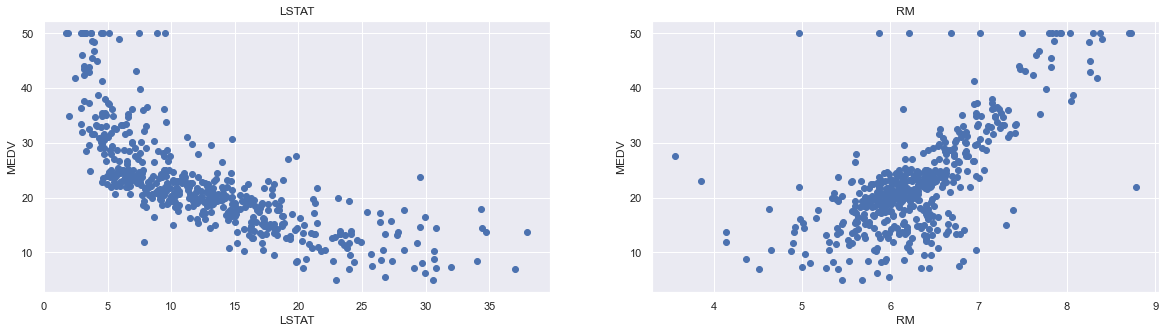

In [11]:
#построим диаграммы рассеиваний для переменных LSTAT, RM
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

* Цены на дома имеют тенденцию к снижению с ростом LSTAT (население с более низким статусом).
* Цены на дома растут по мере линейного увеличения количества комнат. Существует несколько выбросов.

## <center> 4. Линейная регрессия в statsmodels, значимость и интерпретация коэффициентов, метрики качества <center>

**Подготовим данные - разделим датасет на целевую и объясняющие переменные**

In [12]:
X = boston[['LSTAT', 'RM', 'CRIM', 'DIS', 'PTRATIO']] #набор характеристик
Y = boston['MEDV'] # целевая переменная

In [13]:
X = sm.add_constant(X) #для построения модели добавляем константу
model = sm.OLS(Y, X) #создание модели с МНК
res = model.fit() #c помощью .fit() вычисляются оптимальные значение весов b₀ и b₁, 
#используя существующие вход и выход (x и y) в качестве аргументов. 
res.summary() #выводит результаты модели - коэффициенты, метрики качества

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.693
Method:                 Least Squares   F-statistic:                     228.7
Date:                Thu, 24 Feb 2022   Prob (F-statistic):          1.10e-126
Time:                        16:12:51   Log-Likelihood:                -1539.2
No. Observations:                 506   AIC:                             3090.
Df Residuals:                     500   BIC:                             3116.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.8945      4.080      5.611      0.000      14.879      30.910
LSTAT         -0.6244      0.048    -12.911      0.000      -0.719      -0.529
RM             4.3326      0.422     10.266      0.000       3.503       5.162
CRIM          -0.0918      0.031     -2.998      0.003      -0.152      -0.032
DIS           -0.6201      0.128     -4.845      0.000      -0.872      -0.369
PTRATIO       -0.9214      0.116     -7.914      0.000      -1.150      -0.693
==============================================================================
Omnibus:                      182.594   Durbin-Watson:                   0.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              810.523
Skew:                           1.561   Prob(JB):                    9.93e-177
Kurtosis:                       8.357   Cond. No.                         442.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

1) Метрика качества **R-squared:	0.696**


    R-squared - он же R^2 (R-квадрат) - характеризует долю вариации результативного показателя, объясненную вариацией включенных в модель факторов  
Чем ближе  R-squared к единице, тем выше качество построенной модели - выше доля объясненной дисперсии таргета. В нашем случае качество модели не сильно впечатляет, но вполне устраивает, есть множество методов повысить качество модели (о них вы узнаете позднее)


2) Коэффициенты **LSTAT	-0.6244, RM	4.3326** и т.д. - это и есть коэффициенты уравнения линейной регрессии (веса).
**const	22.8945** - та самая константа b0. Таким образом, уравнение модели линейной регрессии принял вид:
### <center>  __MEDV__= 22.8945 + (-0.6244)**LSTAT** + 4.3326**RM** + (-0.0918)**CRIM** + (-0.6201)**DIS** + (-0.9214)**PTRATIO** <center> 
    
Мы видим, что почти все характеристики, включенные в модель имеют **значимое (все P>|t| меньше 0.05) отрицательное влияние** на стоимость домов, кроме RM - кол-во комнат в доме повышает стоимость дома.

Для интерпретации коэффициентов используем понятие **предельный (маржинальный) эффект**. Предельный эффект показывает, насколько изменится в среднем, при прочих равных условиях, результативная переменная, при изменении конкретного фактора на 1 единицу. 

### **Полная интерпретация модели:** 

Cтандартный дом в Бостоне стоит 22.8945 тысяч долларов,но  
   
1) при изменении фактора LSTAT (процент населения с более низким статусом) на 1 единицу - цена дома (в среднем, при прочих равных условиях) снижается на 0.6244,   
2) при изменении фактора RM (cреднее количество комнат в жилом доме) на 1 единицу - цена дома (в среднем, при прочих равных условиях) повышается на 4.3326,   
3) при изменении фактора CRIM (уровень преступности на душу населения) на 1 единицу - цена дома (в среднем, при прочих равных условиях) снижается на 0.0918,   
4) при изменении фактора DIS (Взвешенное расстояние до пяти центров занятости Бостона) на 1 единицу - цена дома (в среднем, при прочих равных условиях) снижается на 0.6201,   
5) при изменении фактора PTRATIO (соотношение учеников и учителей) на 1 единицу - цена дома (в среднем, при прочих равных условиях) снижается на 0.9214. 

**Задание 3**. Постройте модель линейной регрессии по датасету жилья в Бостоне, но используя другой набор характеристик, оцените значимость модели, ее качество и проинтерпретируйте результаты (если модель значима).

In [14]:
###YOUR CODE HERE


# <center> Простая линейная регрессия со scikit-learn 

**Подготовим данные - разделим датасет на целевую и объясняющие переменные**

In [15]:
X = boston[['LSTAT', 'RM', 'CRIM', 'DIS', 'PTRATIO']]
Y = boston['MEDV']

**Разделим данные на наборы для обучения и тестирования модели**

In [16]:
from sklearn.model_selection import train_test_split

# разбивает набор обучающих и тестовых данных 80% на 20%

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 5)
(102, 5)
(404,)
(102,)


**Обучим модель с помощью sklearn LinearRegression**

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [18]:
# оценка модели для тренировочного набора

y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# оценка модели для тестового набора

y_test_predict = lin_model.predict(X_test)

# среднеквадратическая ошибка модели
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

# R-квадрат модели
r2 = r2_score(Y_test, y_test_predict)

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))

The model performance for training set
--------------------------------------
RMSE is 5.143179692469996
R2 score is 0.6920631594202884


The model performance for testing set
--------------------------------------
RMSE is 4.839066175698292
R2 score is 0.7009144925356343


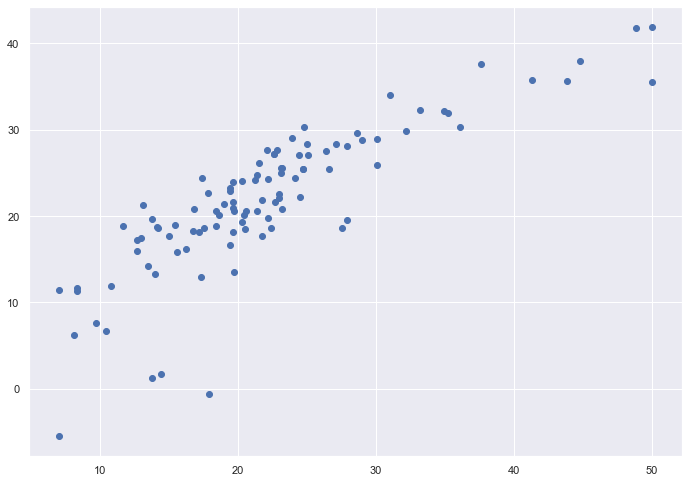

In [19]:
# график зависимости y_test от y_pred
# в идеале должна быть прямая линия
plt.scatter(Y_test, y_test_predict)
plt.show()

**Задание 4**. Что можете сказать о полученных метриках качества модели? Выведите значения коэффициентов и константы, проинтерпретируйте их значения.

(lin_model содержит атрибут .intercept_, который представляет собой константный коэффициент b₀ и атрибут .coef_, который представляет собой набор коэффициентов(весов) модели)

In [20]:
###YOUR CODE HERE


<img src="https://www.meme-arsenal.com/memes/28b4be031c6d36a517b71e1fb1906854.jpg" style="width: 400px">